# Linear Regression Assignment- Bike Rental Demand Prediction
### Avinash Suresh (avinashsuresh1@gmail.com)

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Inspecting the dataframe
bike.shape

(730, 16)

In [5]:
# Performing info and describe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We see that there are no missing values. Also, most variables are centered around the mean.

In [7]:
# Removing unnecessary columns
cols_to_remove = ['instant', 'dteday', 'casual', 'registered']
bike1 = bike.drop(cols_to_remove, axis=1)
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


We have dropped some columns. 'instant' was just an index. 'dteday' was date column, but because we already have 'yr' and 'mnth', we don't need it. 'casual' and 'registered' are simply the components of 'cnt'. Their sum is equal to 'cnt'. So instead of keeping them, we can use 'cnt' only. Also, it may cause multicollinearity problems if we keep them.

From the data dictionary, we see that there are some categorical columns with different levels represented numerically other than 0 or 1. These columns are 'season', 'mnth', 'weekday', 'weathersit'. To deal with them, we will first convert them to categorical data type and then use dummy variables to represent the different levels using 1 or 0 numerically. 

In [8]:
# Converting columns to categorical data type
to_category = ['season', 'mnth', 'weekday', 'weathersit']
for col in to_category:
    bike1[col] = bike1[col].astype('category')
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [9]:
# Creating dummy variables
bike2 = pd.get_dummies(bike1, drop_first=True)
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [10]:
bike2

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,0,1,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,0,1,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0


We have got dummy columns. We have four seasons- spring(1), summer(2), fall(3), winter(4) out of which the last three are specified(drop_first has dropped the first column spring). If season is 0 for all 3 season columns, it is spring. Similarly for month, if all mnth columns are zero, it is January. If all weekday columns are zero, it is Sunday. Similarly, if both weathersit columns 2 and 3 are 0, it is weathersit1(Clear, Few clouds, Partly cloudy, Partly cloudy).

We will now split the data into train and test(70-30).

In [63]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike2, train_size = 0.70, test_size = 0.30, random_state = 100)

In [12]:
bike_train.shape #shape of train

(510, 30)

In [13]:
bike_test.shape #shape of test

(219, 30)

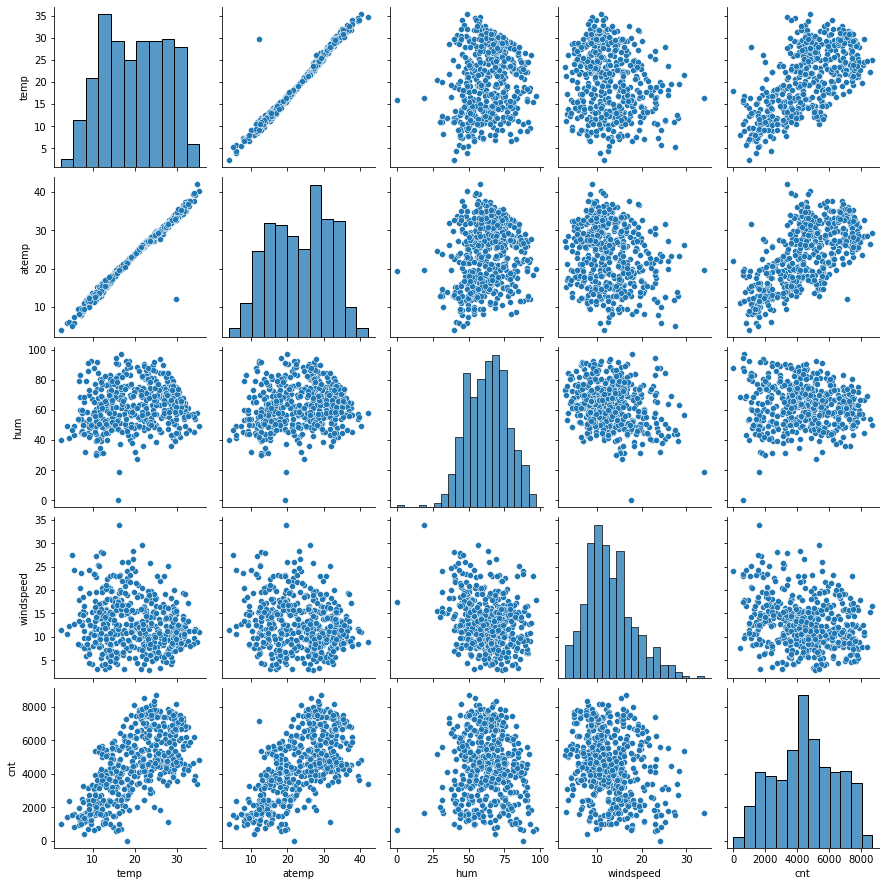

In [14]:
# We will now analyze numerical and categorical variables separately
num_bike_train = bike_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_bike_train)
plt.show()

We see some linear relationship of target 'cnt' with 'temp' and 'atemp'. 'temp' and 'atemp' are also very linearly related, which indicates multicollinearity.

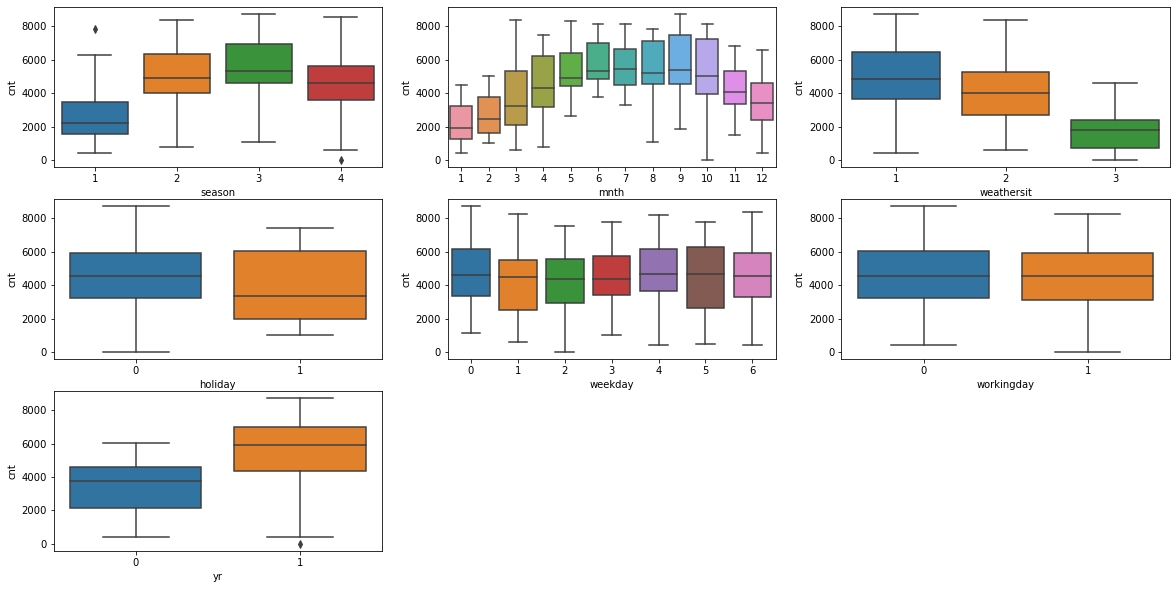

In [15]:
# Visualizing categorical variables
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike1)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike1)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike1)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike1)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike1)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike1)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike1)
plt.show()


We observe that seasonwise, fall has the highest rentals. Monthwise, september seems to have the highest rentals. A clear weather seems to be ideal for bike rentals. The median count of bike rentals is more when there is not a holiday. The rentals show little variation in the days of week. Working day doesn't seem to have much effect on rentals. Year 2019 has had more rentals than 2018. 

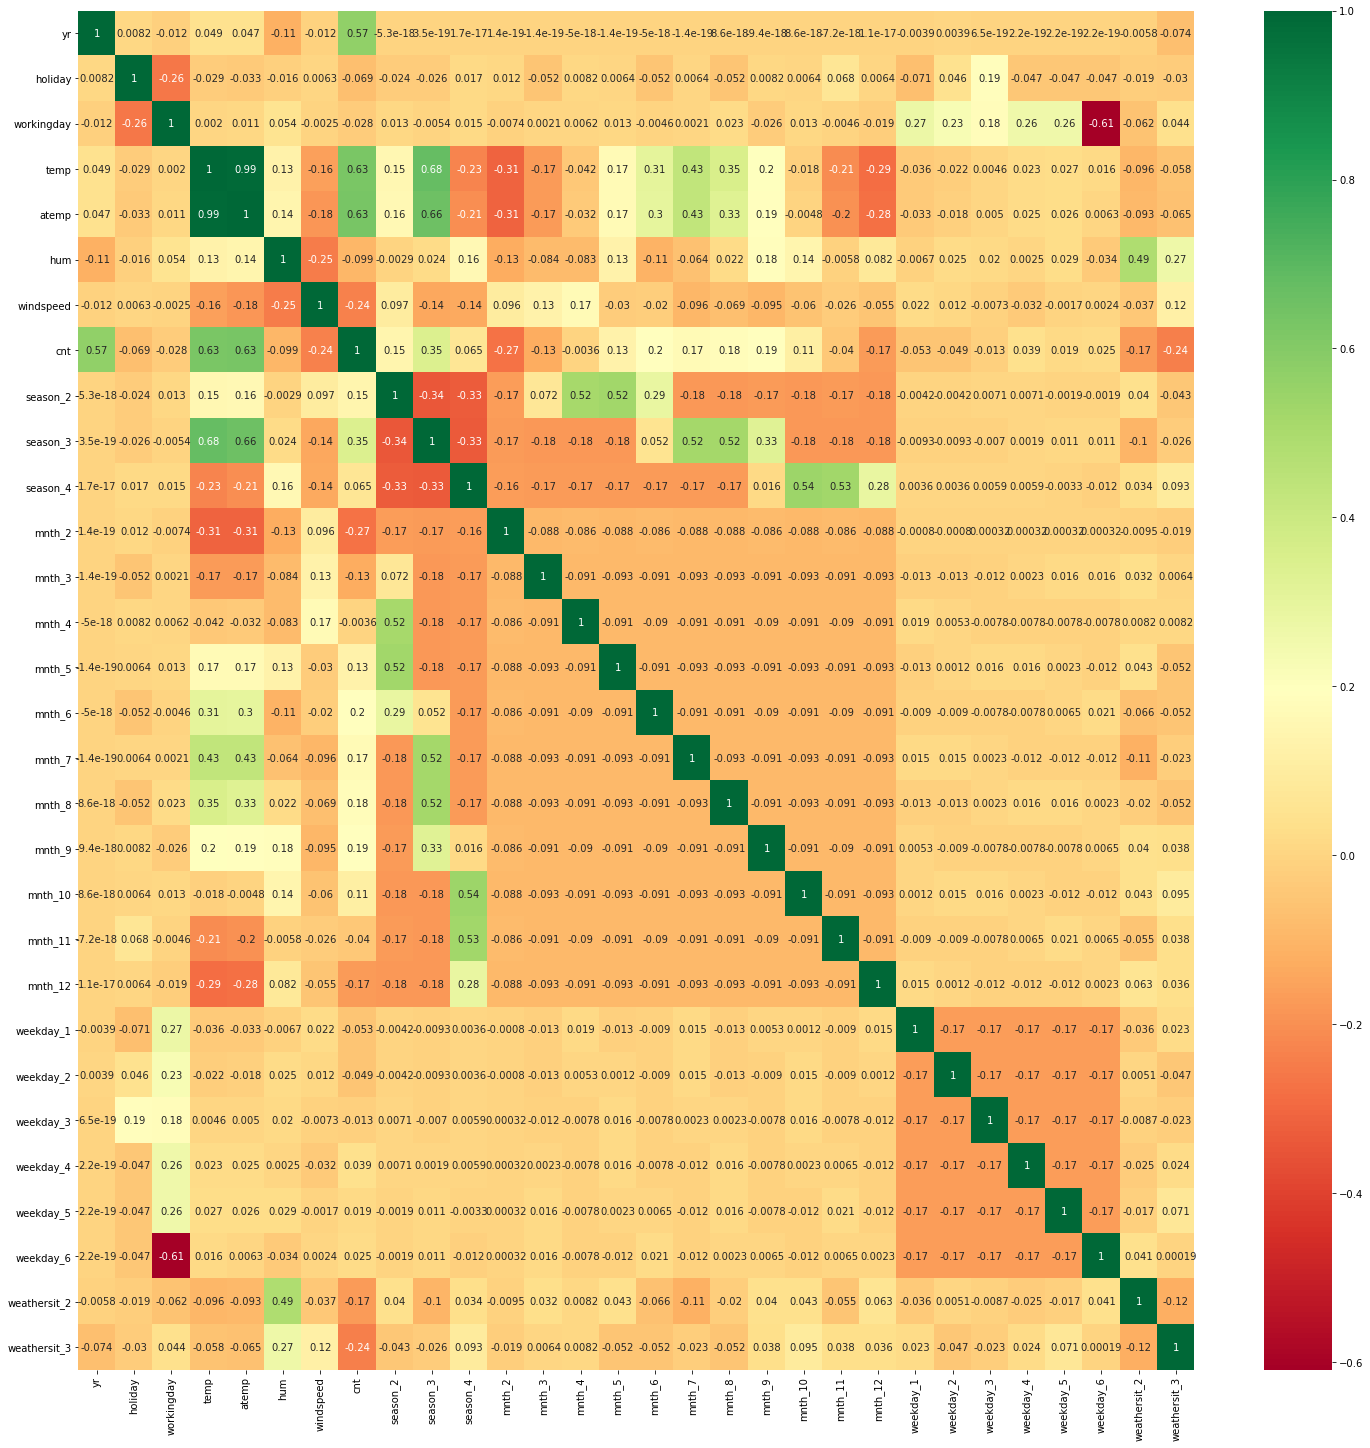

In [16]:
# Checking correlation of variables using heatmap
plt.figure(figsize = (25,25)) # setting figure size for better visibility
sns.heatmap(bike2.corr(), annot = True, cmap="RdYlGn")
plt.show()

We will refer to this heatmap while model building.

As we see, there are some variables with values 0 and 1, while others have some large numerical values. So it is necessary to bring all variables in the same scale. we will do this using MinMax scaler.

In [17]:
# Creating the scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
# Fitting and transforming on numeric variables of train data
num_bike = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_bike] = scaler.fit_transform(bike_train[num_bike])
bike_train.head() #viewing changes

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


We can now create our X and y variables for the model.

In [19]:
# Creating X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

We will use Recursive Feature Elimination(RFE) for selecting features. We will build model using LinearRegression() object.

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # creating object
lr.fit(X_train, y_train) # fitting the data

rfe = RFE(lr, 20)   # Asking RFE object to select 20 features        
rfe = rfe.fit(X_train, y_train) # fitting data using RFE

In [21]:
# Determining which variables are useful
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_4', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [22]:
# Using statsmodels to build model
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# See the summary
lr1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Mon, 03 May 2021   Prob (F-statistic):          4.63e-186
Time:                        15:21:15   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     489   BIC:                            -910.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2446      0.028      8.790      0.000       0.190       0.299
yr               0.2305      0.008     28.597      0.000       0.215       0.246
holiday         -0.1014      0.026     -3.868      0.000      -0.153      -0.050
workingday      -0.0234      0.009     -2.481      0.013      -0.042      -0.005
temp             0.4138      0.138      3.006      0.003       0.143       0.684
atemp            0.0495      0.138      0.358      0.720      -0.222       0.321
hum             -0.1616      0.038     -4.240      0.000      -0.237      -0.087
windspeed       -0.1808      0.026     -6.891      0.000      -0.232      -0.129
season_2         0.0875      0.022      4.017      0.000       0.045       0.130
season_3         0.0487      0.023      2.098      0.036       0.003       0.094
season_4         0.1593      0.014     11.131      0.000       0.131       0.187
mnth_3           0.0488      0.017      2.885      0.004       0.016       0.082
mnth_4           0.0437      0.026      1.690      0.092      -0.007       0.094
mnth_5           0.0682      0.026      2.594      0.010       0.017       0.120
mnth_6           0.0422      0.023      1.854      0.064      -0.003       0.087
mnth_8           0.0610      0.018      3.349      0.001       0.025       0.097
mnth_9           0.1265      0.018      7.222      0.000       0.092       0.161
mnth_10          0.0461      0.017      2.646      0.008       0.012       0.080
weekday_4        0.0203      0.012      1.720      0.086      -0.003       0.044
weathersit_2    -0.0584      0.010     -5.584      0.000      -0.079      -0.038
weathersit_3    -0.2448      0.026     -9.282      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       76.995   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.620
Skew:                          -0.773   Prob(JB):                     4.05e-42
Kurtosis:                       5.565   Cond. No.                         89.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif # this is the same thing that was done in MLR coding session

,Features,VIF
3,temp,413.64
4,atemp,378.00
5,hum,18.31
8,season_3,9.10
7,season_2,7.46
6,windspeed,4.24
2,workingday,3.93
12,mnth_5,3.74
11,mnth_4,3.35
9,season_4,3.25


We see that temp has the highest VIF. But atemp has the highest p value and second highest VIF. So we will remove atemp. We will only remove one variable at a time.

In [24]:
# Dropping atemp and rebuilding the model
X_train_rfe1 = X_train_rfe.drop(["atemp"], axis = 1)

In [25]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe1)

# Create model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# View summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 03 May 2021   Prob (F-statistic):          4.04e-187
Time:                        15:21:45   Log-Likelihood:                 520.45
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2448      0.028      8.811      0.000       0.190       0.299
yr               0.2304      0.008     28.622      0.000       0.215       0.246
holiday         -0.1017      0.026     -3.883      0.000      -0.153      -0.050
workingday      -0.0232      0.009     -2.466      0.014      -0.042      -0.005
temp             0.4613      0.037     12.437      0.000       0.388       0.534
hum             -0.1610      0.038     -4.232      0.000      -0.236      -0.086
windspeed       -0.1827      0.026     -7.129      0.000      -0.233      -0.132
season_2         0.0874      0.022      4.017      0.000       0.045       0.130
season_3         0.0479      0.023      2.076      0.038       0.003       0.093
season_4         0.1595      0.014     11.162      0.000       0.131       0.188
mnth_3           0.0489      0.017      2.895      0.004       0.016       0.082
mnth_4           0.0442      0.026      1.713      0.087      -0.006       0.095
mnth_5           0.0680      0.026      2.590      0.010       0.016       0.120
mnth_6           0.0417      0.023      1.838      0.067      -0.003       0.086
mnth_8           0.0602      0.018      3.333      0.001       0.025       0.096
mnth_9           0.1264      0.017      7.226      0.000       0.092       0.161
mnth_10          0.0461      0.017      2.649      0.008       0.012       0.080
weekday_4        0.0203      0.012      1.722      0.086      -0.003       0.044
weathersit_2    -0.0585      0.010     -5.596      0.000      -0.079      -0.038
weathersit_3    -0.2455      0.026     -9.344      0.000      -0.297      -0.194
==============================================================================
Omnibus:                       76.284   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.385
Skew:                          -0.767   Prob(JB):                     1.24e-41
Kurtosis:                       5.552   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.11
4,hum,18.12
7,season_3,9.02
6,season_2,7.46
5,windspeed,4.02
2,workingday,3.91
11,mnth_5,3.74
10,mnth_4,3.34
8,season_4,3.25
12,mnth_6,2.47


In [27]:
# Due to its high p value, we drop mnth_4
X_train_rfe2 = X_train_rfe1.drop(["mnth_4"], axis = 1)

In [28]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# View summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.38e-187
Time:                        15:22:12   Log-Likelihood:                 518.92
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     491   BIC:                            -919.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2485      0.028      8.950      0.000       0.194       0.303
yr               0.2307      0.008     28.618      0.000       0.215       0.247
holiday         -0.1023      0.026     -3.899      0.000      -0.154      -0.051
workingday      -0.0229      0.009     -2.430      0.015      -0.041      -0.004
temp             0.4665      0.037     12.598      0.000       0.394       0.539
hum             -0.1666      0.038     -4.388      0.000      -0.241      -0.092
windspeed       -0.1793      0.026     -7.003      0.000      -0.230      -0.129
season_2         0.1135      0.016      7.309      0.000       0.083       0.144
season_3         0.0474      0.023      2.048      0.041       0.002       0.093
season_4         0.1565      0.014     11.013      0.000       0.129       0.184
mnth_3           0.0353      0.015      2.363      0.019       0.006       0.065
mnth_5           0.0374      0.019      1.941      0.053      -0.000       0.075
mnth_6           0.0196      0.019      1.048      0.295      -0.017       0.056
mnth_8           0.0553      0.018      3.095      0.002       0.020       0.090
mnth_9           0.1230      0.017      7.063      0.000       0.089       0.157
mnth_10          0.0453      0.017      2.596      0.010       0.011       0.080
weekday_4        0.0200      0.012      1.689      0.092      -0.003       0.043
weathersit_2    -0.0582      0.010     -5.558      0.000      -0.079      -0.038
weathersit_3    -0.2449      0.026     -9.303      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       78.127   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.443
Skew:                          -0.784   Prob(JB):                     9.87e-43
Kurtosis:                       5.578   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,28.83
4,hum,18.09
7,season_3,9.02
5,windspeed,3.95
2,workingday,3.90
6,season_2,3.79
8,season_4,3.20
16,weathersit_2,2.22
0,yr,2.06
10,mnth_5,1.98


In [30]:
# Drop mnth_6 due to its high p value
X_train_rfe3 = X_train_rfe2.drop(["mnth_6"], axis = 1)

In [31]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# View summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.85e-188
Time:                        15:22:36   Log-Likelihood:                 518.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2479      0.028      8.930      0.000       0.193       0.302
yr               0.2302      0.008     28.610      0.000       0.214       0.246
holiday         -0.1033      0.026     -3.938      0.000      -0.155      -0.052
workingday      -0.0224      0.009     -2.386      0.017      -0.041      -0.004
temp             0.4812      0.034     14.029      0.000       0.414       0.549
hum             -0.1701      0.038     -4.495      0.000      -0.244      -0.096
windspeed       -0.1816      0.026     -7.118      0.000      -0.232      -0.131
season_2         0.1155      0.015      7.487      0.000       0.085       0.146
season_3         0.0436      0.023      1.908      0.057      -0.001       0.089
season_4         0.1545      0.014     10.972      0.000       0.127       0.182
mnth_3           0.0321      0.015      2.195      0.029       0.003       0.061
mnth_5           0.0296      0.018      1.665      0.096      -0.005       0.065
mnth_8           0.0509      0.017      2.930      0.004       0.017       0.085
mnth_9           0.1199      0.017      6.986      0.000       0.086       0.154
mnth_10          0.0434      0.017      2.500      0.013       0.009       0.077
weekday_4        0.0192      0.012      1.627      0.104      -0.004       0.042
weathersit_2    -0.0579      0.010     -5.533      0.000      -0.078      -0.037
weathersit_3    -0.2447      0.026     -9.295      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       77.988   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.589
Skew:                          -0.790   Prob(JB):                     1.12e-41
Kurtosis:                       5.525   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.66
4,hum,17.66
7,season_3,8.80
2,workingday,3.90
5,windspeed,3.89
6,season_2,3.74
8,season_4,3.14
15,weathersit_2,2.22
0,yr,2.05
11,mnth_8,1.85


We see that r squared and adjusted r squared haven't changed, so it was a good decision to drop this column.

In [33]:
# Drop weekday_4 due to its high p value
X_train_rfe4 = X_train_rfe3.drop(["weekday_4"], axis = 1)

In [34]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# View summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 03 May 2021   Prob (F-statistic):          5.18e-189
Time:                        15:23:04   Log-Likelihood:                 516.98
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2487      0.028      8.947      0.000       0.194       0.303
yr               0.2304      0.008     28.601      0.000       0.215       0.246
holiday         -0.1030      0.026     -3.919      0.000      -0.155      -0.051
workingday      -0.0185      0.009     -2.036      0.042      -0.036      -0.001
temp             0.4826      0.034     14.051      0.000       0.415       0.550
hum             -0.1727      0.038     -4.561      0.000      -0.247      -0.098
windspeed       -0.1826      0.026     -7.146      0.000      -0.233      -0.132
season_2         0.1161      0.015      7.518      0.000       0.086       0.146
season_3         0.0440      0.023      1.922      0.055      -0.001       0.089
season_4         0.1543      0.014     10.944      0.000       0.127       0.182
mnth_3           0.0328      0.015      2.241      0.025       0.004       0.062
mnth_5           0.0305      0.018      1.716      0.087      -0.004       0.066
mnth_8           0.0509      0.017      2.929      0.004       0.017       0.085
mnth_9           0.1203      0.017      6.998      0.000       0.087       0.154
mnth_10          0.0436      0.017      2.511      0.012       0.009       0.078
weathersit_2    -0.0582      0.010     -5.552      0.000      -0.079      -0.038
weathersit_3    -0.2468      0.026     -9.373      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       79.798   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.481
Skew:                          -0.807   Prob(JB):                     9.69e-43
Kurtosis:                       5.550   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.64
4,hum,17.63
7,season_3,8.80
5,windspeed,3.89
6,season_2,3.74
2,workingday,3.63
8,season_4,3.14
14,weathersit_2,2.22
0,yr,2.05
11,mnth_8,1.85


In [36]:
# Drop mnth_5 due to its high p value
X_train_rfe5 = X_train_rfe4.drop(["mnth_5"], axis = 1)

In [37]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe5)

# Create model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# View summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.63e-189
Time:                        15:23:39   Log-Likelihood:                 515.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     494   BIC:                            -931.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2432      0.028      8.791      0.000       0.189       0.298
yr               0.2297      0.008     28.495      0.000       0.214       0.246
holiday         -0.1043      0.026     -3.962      0.000      -0.156      -0.053
workingday      -0.0186      0.009     -2.037      0.042      -0.037      -0.001
temp             0.4930      0.034     14.558      0.000       0.426       0.560
hum             -0.1646      0.038     -4.371      0.000      -0.239      -0.091
windspeed       -0.1847      0.026     -7.222      0.000      -0.235      -0.134
season_2         0.1226      0.015      8.169      0.000       0.093       0.152
season_3         0.0371      0.023      1.642      0.101      -0.007       0.081
season_4         0.1513      0.014     10.793      0.000       0.124       0.179
mnth_3           0.0280      0.014      1.947      0.052      -0.000       0.056
mnth_8           0.0504      0.017      2.895      0.004       0.016       0.085
mnth_9           0.1198      0.017      6.955      0.000       0.086       0.154
mnth_10          0.0421      0.017      2.421      0.016       0.008       0.076
weathersit_2    -0.0584      0.011     -5.554      0.000      -0.079      -0.038
weathersit_3    -0.2490      0.026     -9.446      0.000      -0.301      -0.197
==============================================================================
Omnibus:                       77.362   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.399
Skew:                          -0.803   Prob(JB):                     3.01e-39
Kurtosis:                       5.402   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.01
4,hum,17.57
7,season_3,8.53
5,windspeed,3.83
2,workingday,3.63
6,season_2,3.51
8,season_4,3.08
13,weathersit_2,2.22
0,yr,2.04
10,mnth_8,1.85


In [39]:
# Drop season_3 due to high p value
X_train_rfe6 = X_train_rfe5.drop(["season_3"], axis = 1)

In [40]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe6)

# Create model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# View summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.9
Date:                Mon, 03 May 2021   Prob (F-statistic):          4.39e-190
Time:                        15:30:22   Log-Likelihood:                 514.08
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     495   BIC:                            -934.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2435      0.028      8.786      0.000       0.189       0.298
yr               0.2286      0.008     28.409      0.000       0.213       0.244
holiday         -0.1059      0.026     -4.019      0.000      -0.158      -0.054
workingday      -0.0184      0.009     -2.018      0.044      -0.036      -0.000
temp             0.5347      0.022     23.833      0.000       0.491       0.579
hum             -0.1735      0.037     -4.650      0.000      -0.247      -0.100
windspeed       -0.1883      0.026     -7.380      0.000      -0.238      -0.138
season_2         0.1055      0.011      9.728      0.000       0.084       0.127
season_4         0.1401      0.012     11.414      0.000       0.116       0.164
mnth_3           0.0233      0.014      1.647      0.100      -0.004       0.051
mnth_8           0.0607      0.016      3.730      0.000       0.029       0.093
mnth_9           0.1291      0.016      7.923      0.000       0.097       0.161
mnth_10          0.0382      0.017      2.215      0.027       0.004       0.072
weathersit_2    -0.0571      0.010     -5.443      0.000      -0.078      -0.037
weathersit_3    -0.2440      0.026     -9.303      0.000      -0.296      -0.192
==============================================================================
Omnibus:                       69.903   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.405
Skew:                          -0.752   Prob(JB):                     2.19e-33
Kurtosis:                       5.194   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.78
3,temp,10.02
5,windspeed,3.79
2,workingday,3.63
7,season_4,2.35
12,weathersit_2,2.21
0,yr,2.02
6,season_2,1.83
9,mnth_8,1.61
11,mnth_10,1.61


Something interesting has happened here. Now, hum has the highest VIF and temp has the second highest VIF. We will continue dropping insignificant columns to see if we get the desired model...

In [43]:
# Drop mnth_3 due to high p value
X_train_rfe7 = X_train_rfe6.drop(["mnth_3"], axis = 1)

In [44]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe7)

# Create model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

# View summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.8
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.15e-190
Time:                        16:11:02   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     496   BIC:                            -938.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2502      0.027      9.106      0.000       0.196       0.304
yr               0.2288      0.008     28.385      0.000       0.213       0.245
holiday         -0.1085      0.026     -4.118      0.000      -0.160      -0.057
workingday      -0.0187      0.009     -2.046      0.041      -0.037      -0.001
temp             0.5292      0.022     23.814      0.000       0.486       0.573
hum             -0.1747      0.037     -4.676      0.000      -0.248      -0.101
windspeed       -0.1858      0.026     -7.283      0.000      -0.236      -0.136
season_2         0.1055      0.011      9.708      0.000       0.084       0.127
season_4         0.1361      0.012     11.290      0.000       0.112       0.160
mnth_8           0.0588      0.016      3.614      0.000       0.027       0.091
mnth_9           0.1276      0.016      7.828      0.000       0.096       0.160
mnth_10          0.0385      0.017      2.230      0.026       0.005       0.073
weathersit_2    -0.0570      0.011     -5.424      0.000      -0.078      -0.036
weathersit_3    -0.2424      0.026     -9.233      0.000      -0.294      -0.191
==============================================================================
Omnibus:                       69.297   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.467
Skew:                          -0.730   Prob(JB):                     1.06e-34
Kurtosis:                       5.287   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.46
3,temp,9.88
5,windspeed,3.68
2,workingday,3.63
7,season_4,2.27
11,weathersit_2,2.20
0,yr,2.02
6,season_2,1.83
10,mnth_10,1.61
8,mnth_8,1.60


We see that the p values of all variables are below the significance level of 5%. However, hum has high VIF. So we must drop it.

In [46]:
# Drop hum due to high VIF
X_train_rfe8 = X_train_rfe7.drop(["hum"], axis = 1)

In [47]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_rfe8)

# Create model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

# View summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 03 May 2021   Prob (F-statistic):          3.26e-187
Time:                        16:18:49   Log-Likelihood:                 501.68
No. Observations:                 510   AIC:                            -977.4
Df Residuals:                     497   BIC:                            -922.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1523      0.018      8.385      0.000       0.117       0.188
yr               0.2327      0.008     28.422      0.000       0.217       0.249
holiday         -0.1123      0.027     -4.177      0.000      -0.165      -0.059
workingday      -0.0219      0.009     -2.347      0.019      -0.040      -0.004
temp             0.5081      0.022     22.876      0.000       0.464       0.552
windspeed       -0.1521      0.025     -6.087      0.000      -0.201      -0.103
season_2         0.1024      0.011      9.252      0.000       0.081       0.124
season_4         0.1280      0.012     10.508      0.000       0.104       0.152
mnth_8           0.0572      0.017      3.448      0.001       0.025       0.090
mnth_9           0.1209      0.017      7.296      0.000       0.088       0.153
mnth_10          0.0343      0.018      1.945      0.052      -0.000       0.069
weathersit_2    -0.0852      0.009     -9.673      0.000      -0.102      -0.068
weathersit_3    -0.2892      0.025    -11.675      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       67.568   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.879
Skew:                          -0.721   Prob(JB):                     4.69e-33
Kurtosis:                       5.219   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.79
4,windspeed,3.39
2,workingday,3.17
6,season_4,2.02
0,yr,2.01
5,season_2,1.82
9,mnth_10,1.60
7,mnth_8,1.59
10,weathersit_2,1.49
8,mnth_9,1.34


We now see that mnth_10 has become insignificant. So we will remove it.

In [50]:
# Drop mnth_10 due to high p value
X_train_rfe9 = X_train_rfe8.drop(["mnth_10"], axis = 1)

In [51]:
# Add a constant
X_train_lm10 = sm.add_constant(X_train_rfe9)

# Create model
lr10 = sm.OLS(y_train, X_train_lm10).fit()

# View summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.0
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.37e-187
Time:                        16:26:38   Log-Likelihood:                 499.75
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     498   BIC:                            -924.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1479      0.018      8.186      0.000       0.112       0.183
yr               0.2324      0.008     28.313      0.000       0.216       0.248
holiday         -0.1134      0.027     -4.209      0.000      -0.166      -0.060
workingday      -0.0218      0.009     -2.336      0.020      -0.040      -0.003
temp             0.5164      0.022     23.619      0.000       0.473       0.559
windspeed       -0.1499      0.025     -5.989      0.000      -0.199      -0.101
season_2         0.1009      0.011      9.110      0.000       0.079       0.123
season_4         0.1397      0.011     13.171      0.000       0.119       0.161
mnth_8           0.0542      0.017      3.269      0.001       0.022       0.087
mnth_9           0.1159      0.016      7.060      0.000       0.084       0.148
weathersit_2    -0.0843      0.009     -9.562      0.000      -0.102      -0.067
weathersit_3    -0.2837      0.025    -11.497      0.000      -0.332      -0.235
==============================================================================
Omnibus:                       60.100   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.786
Skew:                          -0.670   Prob(JB):                     1.32e-27
Kurtosis:                       5.007   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.67
4,windspeed,3.39
2,workingday,3.17
0,yr,2.01
5,season_2,1.81
7,mnth_8,1.58
6,season_4,1.55
9,weathersit_2,1.49
8,mnth_9,1.31
1,holiday,1.08


Here we have VIF of temp a little greater than 5. But because it is an important variable, we won't drop it. Also, all variables are significant in this model. The values of r squared and adjusted r squared are very close. So we may consider this as our final model, unless it does not give good results on the test data.

So our equation becomes:
 - cnt = 0.1479 + 0.2324yr -0.1134holiday -0.0218workingday + 0.5164temp -0.1499windspeed + 0.1009season_2 + 0.1397season_4 + 0.0542mnth_8 + 0.1159mnth_9 - 0.0843weathersit_2 - 0.2837weathersit_3

In [56]:
# Are error terms normally distributed?
y_train_pred = lr10.predict(X_train_lm10)

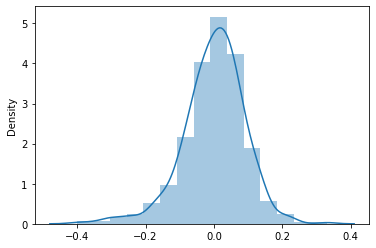

In [59]:
# Plot the histogram of the error terms
sns.distplot(y_train-y_train_pred, bins = 15)
plt.show()

The error terms are normally distributed. So our assumption of linear regression is correct.

We will now make prediction using the model.

In [64]:
# Scaling test variables
num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num] = scaler.transform(bike_test[num])
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Dividing into xtest and ytest
y_test = bike_test.pop('cnt')
X_test = bike_test

In [69]:
# X_test has the variables of X_train_rfe9
X_test = X_test[X_train_rfe9.columns]
# Adding constant
X_test_lm10 = sm.add_constant(X_test)
X_test_lm10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   mnth_8        219 non-null    uint8  
 9   mnth_9        219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 13.3 KB


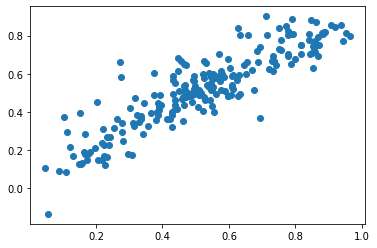

In [71]:
y_pred_test = lr10.predict(X_test_lm10)
plt.scatter(y_test, y_pred_test)
plt.show()

In [72]:
# r squared of test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7962845715797979

In [73]:
# Adjusted r squared of test data
# n is number of rows
n = X_test.shape[0]

# p is number of columns
p = X_test.shape[1]

adjusted_r_squared = 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)
adjusted_r_squared

0.7854591140308983

So we have the following results:
-  R squared(train) = 83.6%
-  Adjusted R squared(train) = 83.3%
-  R squared(test) = 79.6%
-  Adjusted R squared(test) = 78.5%

This shows that our model is good as the R squared and Adjusted R squared values haven't changed much for test and train.

Our model shows which variables are significant and how well they affect the rental count. The most significant variable is temp(temperature).